In [987]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option ('display.max_column', None)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf

In [988]:
df = pd.read_csv("C:\\Users\Admin\\Desktop\\capstone project\\main project\\Life Expectancy Data.csv")
#df=pd.DataFrame(df)

# Exploratory data analysis (EDA)

In [989]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [990]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [991]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [992]:
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     362
Adult Mortality                     425
infant deaths                       209
Alcohol                            1076
percentage expenditure             2328
Hepatitis B                          87
Measles                             958
 BMI                                608
under-five deaths                   252
Polio                                73
Total expenditure                   818
Diphtheria                           81
 HIV/AIDS                           200
GDP                                2490
Population                         2278
 thinness  1-19 years               200
 thinness 5-9 years                 207
Income composition of resources     625
Schooling                           173
dtype: int64

# Basic Data Cleaning and Preprocessing

#### ● Finding Missing Values

##### ● Missing values can prove to be a major pain as they may affect the run of the algorithms as almost all the algorithms expect the full data but return error if some points are missing. So, cleaning the data is essential!

In [993]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

● we can see that many attributes have missing values, like Hepatitis B has 2385 values, whereas the expected number of values for every attribute is 2938. Now we have to find a way to fill in all these missing values as these may cause problems for our algorithm. We'll use the impute method of pd.DataFrame.fillna and impute the median values in all these missing fields.

● Data cleaning and preprocessing is very essential to get an overall feel of the data. Preprocessing is important to feed the data further in the algorithms so that they can work effectively!

<AxesSubplot:>

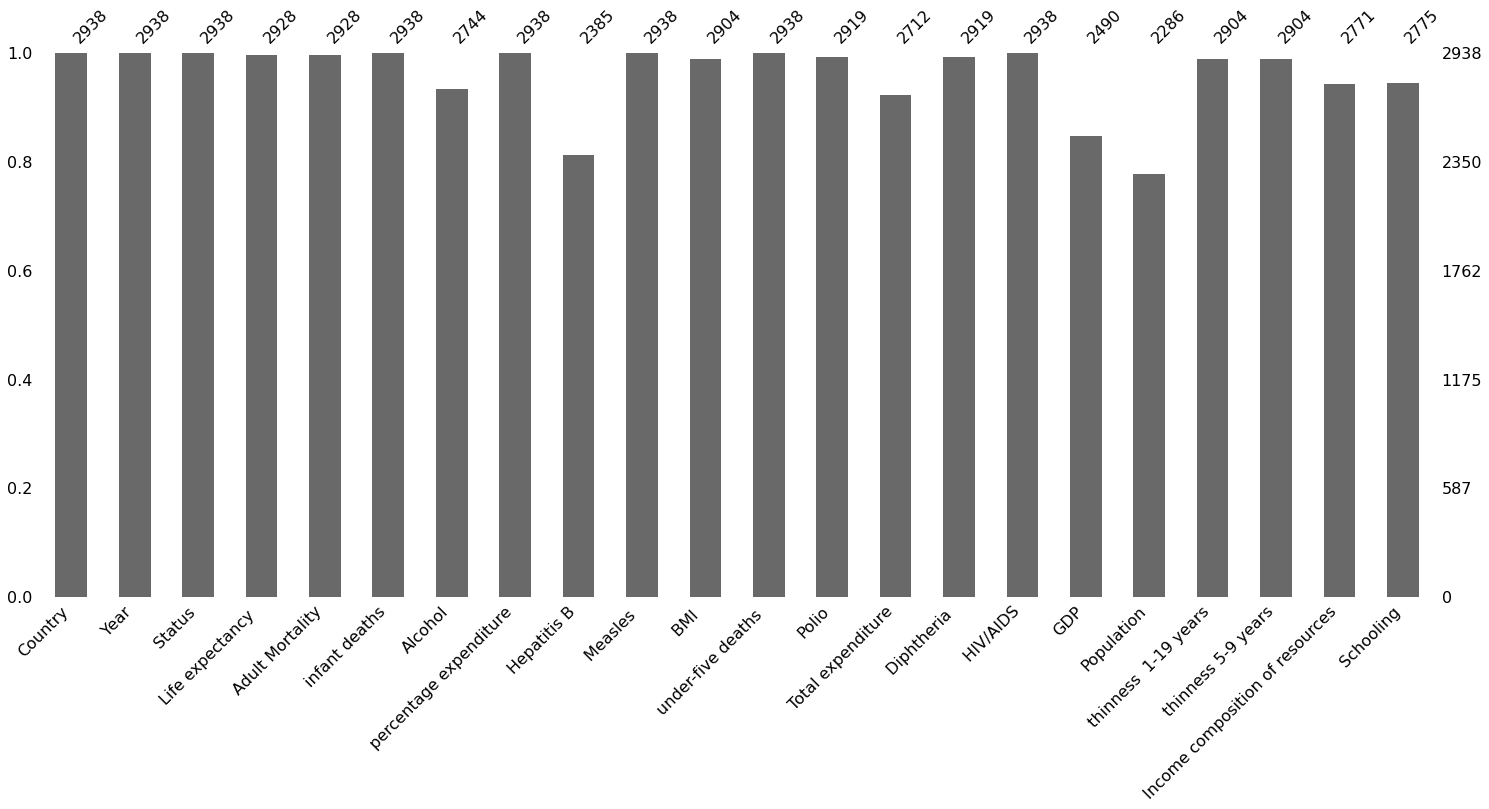

In [994]:
import missingno as msno
msno.bar(df)


In [995]:
df.shape

(2938, 22)

## ● We can see that our dataset contains 2938 rows and 22 attributes!

In [996]:
df=df.rename ({'Life expectancy ':'Life_expectancy','Adult Mortality':'Adult_Mortality','infant deaths':'infant_deaths','percentage expenditure':'percentage_expenditure','Hepatitis B':'Hepatitis_B','under-five deaths ':'under_five_deaths','Total expenditure':'Total_expenditure',' thinness 5-9 years':'thinness_five_nine_years',' thinness  1-19 years':'thinness_one_nineteen_years','Income composition of resources':'Income_composition_of_resources',' BMI ':'BMI','Diphtheria ':'Diphtheria','Measles ':'Measles','under_five_deaths ':'under_five_deaths',' HIV/AIDS':'HIV_AIDS'},axis=1)

In [997]:
df. Alcohol . fillna (df . Alcohol .median (), inplace = True )
df. Adult_Mortality. fillna (df. Adult_Mortality. median (), inplace = True)
df. Adult_Mortality. fillna (df. Adult_Mortality. median (), inplace = True)
df. Hepatitis_B. fillna (df. Hepatitis_B. median (), inplace =True)
df. BMI. fillna (df. BMI. median (), inplace =True)
df. Polio. fillna (df. Polio. median (), inplace= True)
df. Total_expenditure. fillna (df. Total_expenditure. median (), inplace = True)
df. Diphtheria. fillna(df. Diphtheria. median(), inplace = True)
df. GDP. fillna (df. GDP. median (), inplace = True)
df. Population. fillna (df. Population. median () , inplace = True)
df. thinness_one_nineteen_years. fillna (df. thinness_one_nineteen_years. median (), inplace = True)
df. thinness_five_nine_years. fillna (df. thinness_five_nine_years. median (), inplace = True)
df. Income_composition_of_resources. fillna (df. Income_composition_of_resources. median (), inplace = True)
df. Schooling. fillna (df. Schooling. median (), inplace = True)
df. Life_expectancy. fillna (df. Life_expectancy. median (), inplace = True)

In [998]:
df.isnull ().sum ()

Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
thinness_one_nineteen_years        0
thinness_five_nine_years           0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [999]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2938 non-null   float64
 4   Adult_Mortality                  2938 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under_five_deaths                2938 non-null   int64  
 12  Polio               

# Life_expectancy

In [1000]:
df.value_counts ('Life_expectancy')

Life_expectancy
73.0    45
75.0    33
78.0    31
73.6    28
76.0    25
        ..
46.3     1
45.4     1
45.1     1
44.0     1
36.3     1
Length: 362, dtype: int64

<AxesSubplot:xlabel='Life_expectancy', ylabel='Density'>

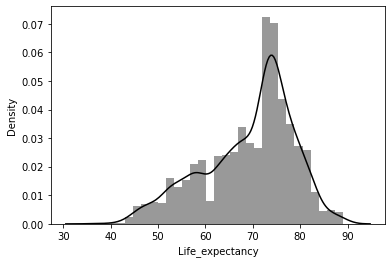

In [1001]:
#______histogram
sns.distplot(df['Life_expectancy'],color='black')

<AxesSubplot:>

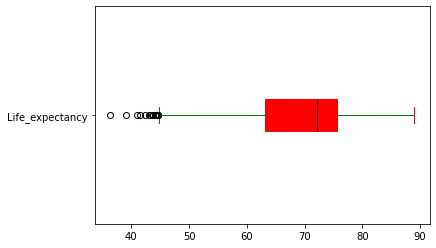

In [1002]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Life_expectancy'].plot.box(color=props2, patch_artist = True, vert = False)


In [1003]:
q1 = df['Life_expectancy'].quantile(0.25)
q3 = df['Life_expectancy'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1004]:
df['Life_expectancy'] = np.where(df['Life_expectancy']>ul, ul, df['Life_expectancy'])
df['Life_expectancy'] = np.where(df['Life_expectancy']<ll, ll, df['Life_expectancy'])

<AxesSubplot:>

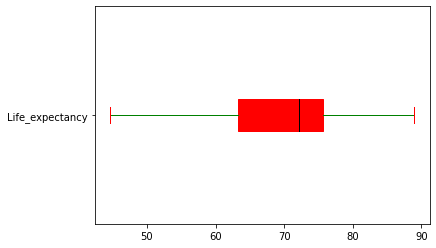

In [1005]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Life_expectancy'].plot.box(color=props2, patch_artist = True, vert = False)

# Country

In [1006]:
df.value_counts('Country')

Country
Afghanistan              16
Peru                     16
Nicaragua                16
Niger                    16
Nigeria                  16
                         ..
Palau                     1
Niue                      1
Nauru                     1
Saint Kitts and Nevis     1
Dominica                  1
Length: 193, dtype: int64

In [1007]:
print('Top 10 Countries with Most Life_expectancy')
df.groupby('Country').agg({
    'Life_expectancy':'mean'
}).reset_index().sort_values('Life_expectancy', ascending = False).head(10)

Top 10 Countries with Most Life_expectancy


,Country,Life_expectancy
84,Japan,82.53750
165,Sweden,82.51875
75,Iceland,82.44375
166,Switzerland,82.33125
60,France,82.21875
82,Italy,82.18750
160,Spain,82.06875
7,Australia,81.81250
125,Norway,81.79375
30,Canada,81.68750


In [1008]:
print('Top 10 Countries with Least Life_expectancy')
df.groupby('Country').agg({
    'Life_expectancy':'mean'
}).reset_index().sort_values('Life_expectancy', ascending = True).head(10)

Top 10 Countries with Least Life_expectancy


,Country,Life_expectancy
152,Sierra Leone,47.12500
31,Central African Republic,48.51250
94,Lesotho,48.78750
3,Angola,49.01875
100,Malawi,50.09375
32,Chad,50.38750
44,Côte d'Ivoire,50.38750
192,Zimbabwe,50.51250
164,Swaziland,51.32500
123,Nigeria,51.35625


In [1009]:
df.drop(columns='Country', inplace=True, axis=1)

# Year

In [1010]:
df.value_counts('Year')

Year
2013    193
2000    183
2001    183
2002    183
2003    183
2004    183
2005    183
2006    183
2007    183
2008    183
2009    183
2010    183
2011    183
2012    183
2014    183
2015    183
dtype: int64

<AxesSubplot:xlabel='Year', ylabel='Density'>

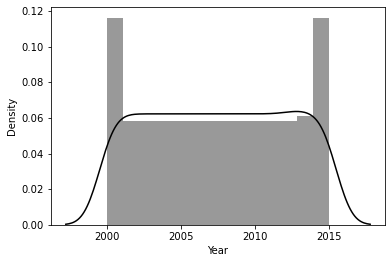

In [1011]:
#______histogram
sns.distplot(df['Year'],color='black')

<AxesSubplot:>

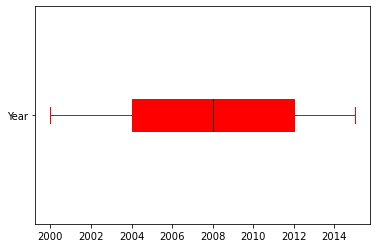

In [1012]:
#____boxplot
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Year'].plot.box(color=props2, patch_artist = True, vert = False)

# Status

In [1013]:
df.value_counts('Status')

Status
Developing    2426
Developed      512
dtype: int64

Text(0.5, 1.0, 'Barplot of :Status ')

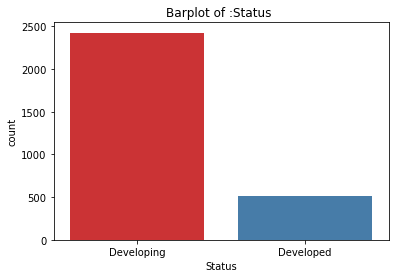

In [1014]:
# Bar Plot
sns.countplot(x = 'Status', data =df , palette = 'Set1')
plt.title('Barplot of :Status ')

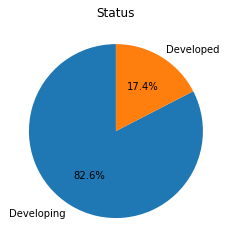

In [1015]:
counts = df['Status'].value_counts()
fig, ax = plt.subplots()
ax.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Status')
plt.show()

Life Expectancy Comparison in Developed and Developing Countries

In [1016]:
df.Status=df.Status.map({'Developing':1,'Developed':0})

In [1017]:
df.value_counts('Status')

Status
1    2426
0     512
dtype: int64

# Annova test

In [1018]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod = ols('Life_expectancy ~ Status', data = df).fit()
aov_table = sm.stats.anova_lm(mod)
print(aov_table)

              df         sum_sq       mean_sq           F         PR(>F)
Status       1.0   61427.374180  61427.374180  890.259689  4.336803e-171
Residual  2936.0  202582.204772     68.999389         NaN            NaN


# Adult_Mortality

In [1019]:
df.value_counts('Adult_Mortality')

Adult_Mortality
12.0     34
144.0    32
14.0     30
16.0     29
138.0    25
         ..
463.0     1
462.0     1
461.0     1
333.0     1
723.0     1
Length: 425, dtype: int64

<AxesSubplot:xlabel='Adult_Mortality', ylabel='Density'>

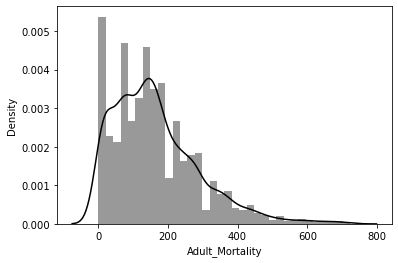

In [1020]:
#______histogram
sns.distplot(df['Adult_Mortality'],color='black')

<AxesSubplot:>

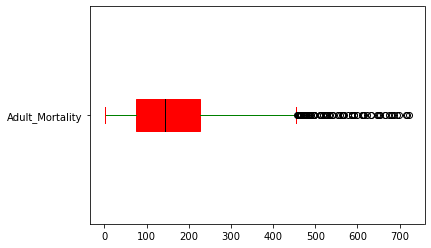

In [1021]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Adult_Mortality'].plot.box(color=props2, patch_artist = True, vert = False)

In [1022]:
# Outliers
q1 = df['Adult_Mortality'].quantile(0.25)
q3 = df['Adult_Mortality'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1023]:
df['Adult_Mortality'] = np.where(df['Adult_Mortality']>ul, ul, df['Adult_Mortality'])
df['Adult_Mortality'] = np.where(df['Adult_Mortality']<ll, ll, df['Adult_Mortality'])

<AxesSubplot:>

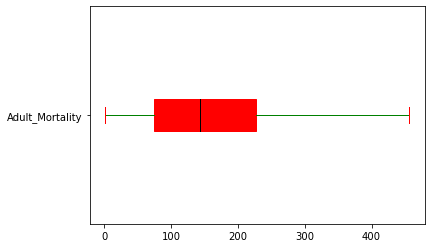

In [1024]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Adult_Mortality'].plot.box(color=props2, patch_artist = True, vert = False)

# infant_deaths

In [1025]:
df.value_counts('infant_deaths')

infant_deaths
0      848
1      342
2      203
3      175
4       96
      ... 
99       1
100      1
173      1
171      1
110      1
Length: 209, dtype: int64

<AxesSubplot:xlabel='infant_deaths', ylabel='Density'>

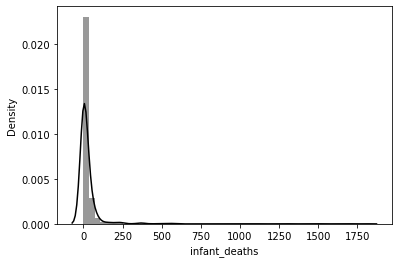

In [1026]:
#______histogram
sns.distplot(df['infant_deaths'],color='black')

<AxesSubplot:>

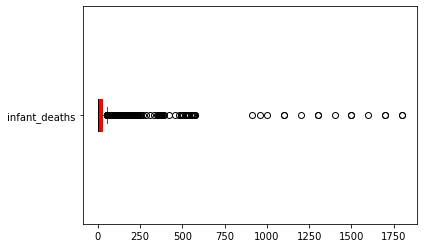

In [1027]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['infant_deaths'].plot.box(color=props2, patch_artist = True, vert = False)

In [1028]:
# Outliers
q1 = df['infant_deaths'].quantile(0.25)
q3 = df['infant_deaths'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1029]:
df['infant_deaths'] = np.where(df['infant_deaths']>ul, ul, df['infant_deaths'])
df['infant_deaths'] = np.where(df['infant_deaths']<ll, ll, df['infant_deaths'])

<AxesSubplot:>

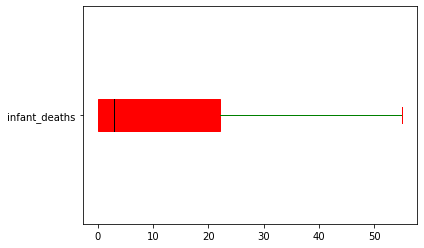

In [1030]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['infant_deaths'].plot.box(color=props2, patch_artist = True, vert = False)

# Alcohol

In [1031]:
df.value_counts('Alcohol')

Alcohol
0.010     288
3.755     194
0.030      15
0.040      13
0.020      12
         ... 
3.590       1
8.630       1
8.620       1
8.610       1
17.870      1
Length: 1077, dtype: int64

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

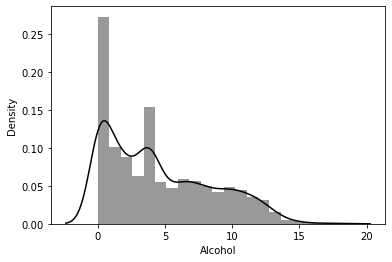

In [1032]:
#______histogram
sns.distplot(df['Alcohol'],color='black')

<AxesSubplot:>

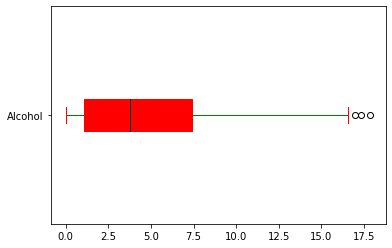

In [1033]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Alcohol'].plot.box(color=props2, patch_artist = True, vert = False)

In [1034]:
# Outliers
q1 = df['Alcohol'].quantile(0.25)
q3 = df['Alcohol'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1035]:
df['Alcohol'] = np.where(df['Alcohol']>ul, ul, df['Alcohol'])
df['Alcohol'] = np.where(df['Alcohol']<ll, ll, df['Alcohol'])

<AxesSubplot:>

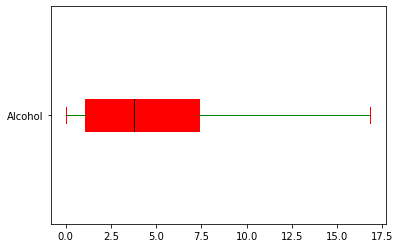

In [1036]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Alcohol'].plot.box(color=props2, patch_artist = True, vert = False)

# percentage_expenditure

In [1037]:
df.value_counts('percentage_expenditure')

percentage_expenditure
0.000000        611
373.260553        1
396.627097        1
397.753369        1
398.605832        1
               ... 
56.056864         1
56.431387         1
56.589842         1
56.762217         1
19479.911610      1
Length: 2328, dtype: int64

<AxesSubplot:xlabel='percentage_expenditure', ylabel='Density'>

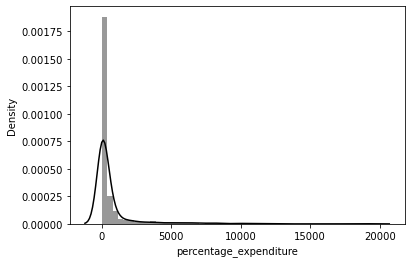

In [1038]:
#______histogram
sns.distplot(df['percentage_expenditure'],color='black')

<AxesSubplot:>

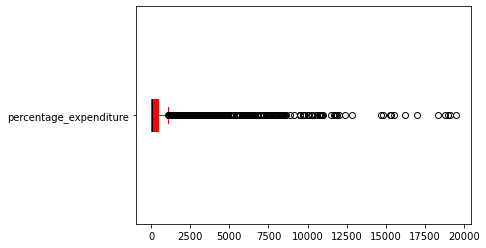

In [1039]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['percentage_expenditure'].plot.box(color=props2, patch_artist = True, vert = False)

In [1040]:
# Outliers
q1 = df['percentage_expenditure'].quantile(0.25)
q3 = df['percentage_expenditure'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1041]:
df['percentage_expenditure'] = np.where(df['percentage_expenditure']>ul, ul, df['percentage_expenditure'])
df['percentage_expenditure'] = np.where(df['percentage_expenditure']<ll, ll, df['percentage_expenditure'])

<AxesSubplot:>

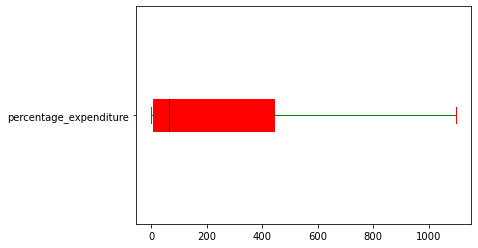

In [1042]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['percentage_expenditure'].plot.box(color=props2, patch_artist = True, vert = False)

# Hepatitis_B

In [1043]:
df.value_counts('Hepatitis_B')

Hepatitis_B
92.0    645
99.0    240
98.0    210
96.0    167
97.0    155
       ... 
16.0      1
19.0      1
23.0      1
26.0      1
1.0       1
Length: 87, dtype: int64

<AxesSubplot:xlabel='Hepatitis_B', ylabel='Density'>

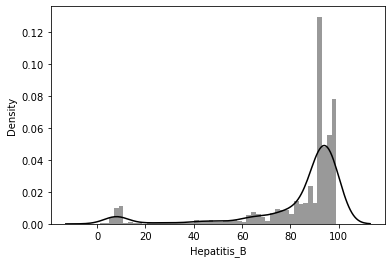

In [1044]:
#______histogram
sns.distplot(df['Hepatitis_B'],color='black')

<AxesSubplot:>

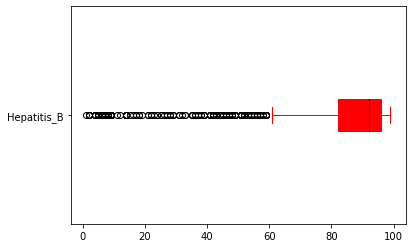

In [1045]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Hepatitis_B'].plot.box(color=props2, patch_artist = True, vert = False)

In [1046]:
# Outliers
q1 = df['Hepatitis_B'].quantile(0.25)
q3 = df['Hepatitis_B'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1047]:
df['Hepatitis_B'] = np.where(df['Hepatitis_B']>ul, ul, df['Hepatitis_B'])
df['Hepatitis_B'] = np.where(df['Hepatitis_B']<ll, ll, df['Hepatitis_B'])

<AxesSubplot:>

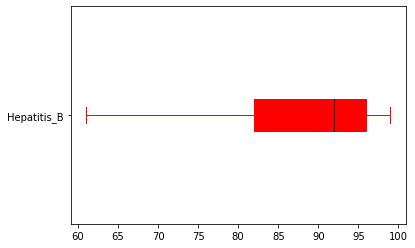

In [1048]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Hepatitis_B'].plot.box(color=props2, patch_artist = True, vert = False)

# Measles

In [1049]:
df.value_counts('Measles')

Measles
0         983
1         104
2          68
3          44
4          33
         ... 
1043        1
1060        1
1064        1
1081        1
212183      1
Length: 958, dtype: int64

<AxesSubplot:xlabel='Measles', ylabel='Density'>

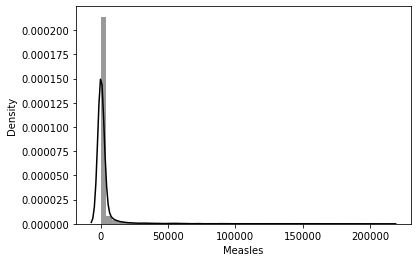

In [1050]:
#______histogram
sns.distplot(df['Measles'],color='black')

<AxesSubplot:>

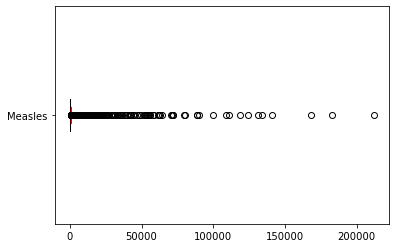

In [1051]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Measles'].plot.box(color=props2, patch_artist = True, vert = False)

In [1052]:
# Outliers
q1 = df['Measles'].quantile(0.25)
q3 = df['Measles'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1053]:
df['Measles'] = np.where(df['Measles']>ul, ul, df['Measles'])
df['Measles'] = np.where(df['Measles']<ll, ll, df['Measles'])

<AxesSubplot:>

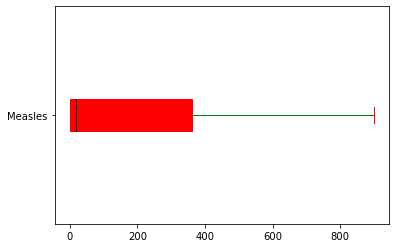

In [1054]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Measles'].plot.box(color=props2, patch_artist = True, vert = False)

# BMI

In [1055]:
df.value_counts('BMI')

BMI
43.5    38
58.5    18
57.0    16
55.8    16
54.2    15
        ..
33.4     1
32.8     1
32.6     1
32.0     1
87.3     1
Length: 608, dtype: int64

<AxesSubplot:xlabel='BMI', ylabel='Density'>

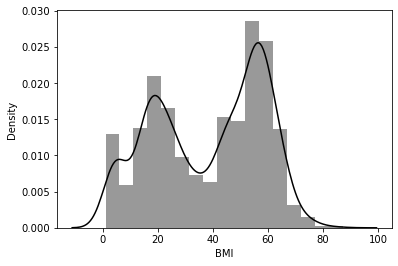

In [1056]:
#______histogram
sns.distplot(df['BMI'],color='black')

<AxesSubplot:>

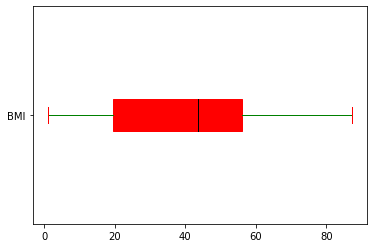

In [1057]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['BMI'].plot.box(color=props2, patch_artist = True, vert = False)

In [1058]:
df.columns

Index(['Year', 'Status', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness_one_nineteen_years',
       'thinness_five_nine_years', 'Income_composition_of_resources',
       'Schooling'],
      dtype='object')

# under_five_deaths

In [1059]:
df.value_counts('under_five_deaths')

under_five_deaths
0       785
1       361
2       163
4       161
3       129
       ... 
221       1
216       1
211       1
202       1
2500      1
Length: 252, dtype: int64

<AxesSubplot:xlabel='under_five_deaths', ylabel='Density'>

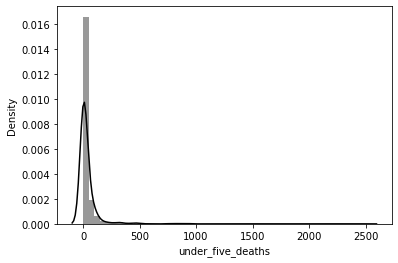

In [1060]:
#______histogram
sns.distplot(df['under_five_deaths'],color='black')

<AxesSubplot:>

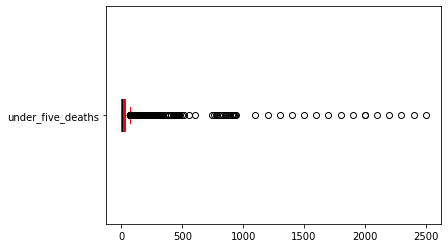

In [1061]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['under_five_deaths'].plot.box(color=props2, patch_artist = True, vert = False)

In [1062]:
# Outliers
q1 = df['under_five_deaths'].quantile(0.25)
q3 = df['under_five_deaths'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1063]:
df['under_five_deaths'] = np.where(df['under_five_deaths']>ul, ul, df['under_five_deaths'])
df['under_five_deaths'] = np.where(df['under_five_deaths']<ll, ll, df['under_five_deaths'])

<AxesSubplot:>

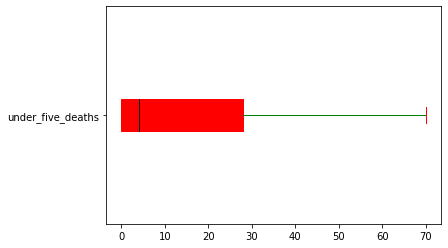

In [1064]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['under_five_deaths'].plot.box(color=props2, patch_artist = True, vert = False)

# Polio

In [1065]:
df.value_counts('Polio')

Polio
99.0    376
98.0    255
96.0    207
97.0    205
95.0    180
       ... 
48.0      2
24.0      2
33.0      1
23.0      1
17.0      1
Length: 73, dtype: int64

<AxesSubplot:xlabel='Polio', ylabel='Density'>

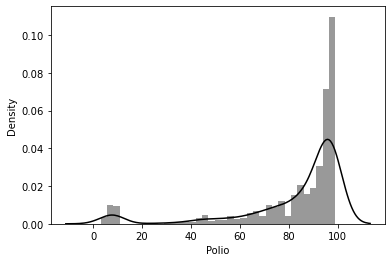

In [1066]:
#______histogram
sns.distplot(df['Polio'],color='black')

<AxesSubplot:>

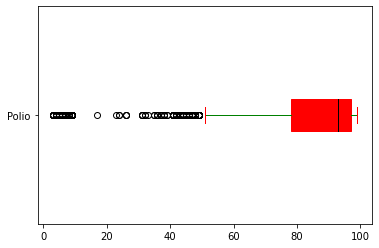

In [1067]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Polio'].plot.box(color=props2, patch_artist = True, vert = False)

In [1068]:
# Outliers
q1 = df['Polio'].quantile(0.25)
q3 = df['Polio'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1069]:
df['Polio'] = np.where(df['Polio']>ul, ul, df['Polio'])
df['Polio'] = np.where(df['Polio']<ll, ll, df['Polio'])

<AxesSubplot:>

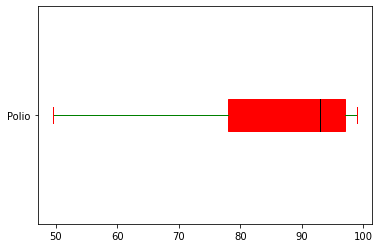

In [1070]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Polio'].plot.box(color=props2, patch_artist = True, vert = False)

# Total_expenditure

In [1071]:
df.value_counts('Total_expenditure')

Total_expenditure
5.755     226
4.600      15
6.700      12
5.600      11
5.900      10
         ... 
7.310       1
7.360       1
7.380       1
7.450       1
17.600      1
Length: 819, dtype: int64

<AxesSubplot:xlabel='Total_expenditure', ylabel='Density'>

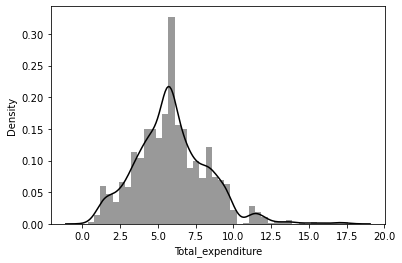

In [1072]:
#______histogram
sns.distplot(df['Total_expenditure'],color='black')

<AxesSubplot:>

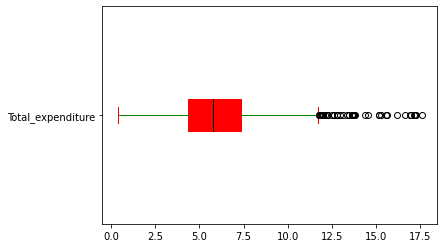

In [1073]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Total_expenditure'].plot.box(color=props2, patch_artist = True, vert = False)

In [1074]:
# Outliers
q1 = df['Total_expenditure'].quantile(0.25)
q3 = df['Total_expenditure'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1075]:
# df['Total_expenditure'] = np.where(df['Total_expenditure']>ul, ul, df['Total_expenditure'])
df['Total_expenditure'] = np.where(df['Total_expenditure']<ll, ll, df['Total_expenditure'])

<AxesSubplot:>

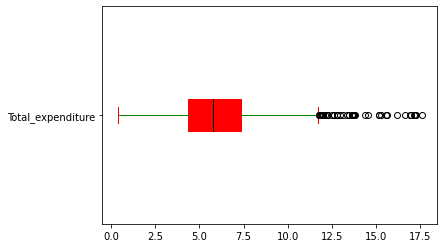

In [1076]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Total_expenditure'].plot.box(color=props2, patch_artist = True, vert = False)

# Diphtheria

In [1077]:
df.value_counts('Diphtheria')

Diphtheria
99.0    350
98.0    254
97.0    205
96.0    201
95.0    200
       ... 
56.0      1
21.0      1
19.0      1
16.0      1
2.0       1
Length: 81, dtype: int64

<AxesSubplot:xlabel='Diphtheria', ylabel='Density'>

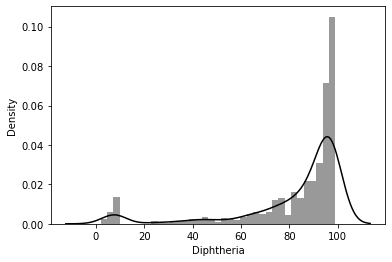

In [1078]:
#______histogram
sns.distplot(df['Diphtheria'],color='black')

<AxesSubplot:>

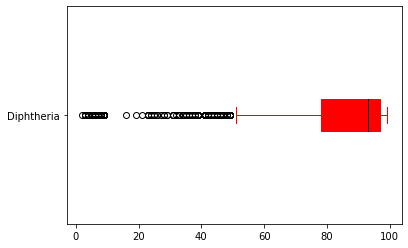

In [1079]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Diphtheria'].plot.box(color=props2, patch_artist = True, vert = False)

In [1080]:
# Outliers
q1 = df['Diphtheria'].quantile(0.25)
q3 = df['Diphtheria'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1081]:
df['Diphtheria'] = np.where(df['Diphtheria']>ul, ul, df['Diphtheria'])
df['Diphtheria'] = np.where(df['Diphtheria']<ll, ll, df['Diphtheria'])

<AxesSubplot:>

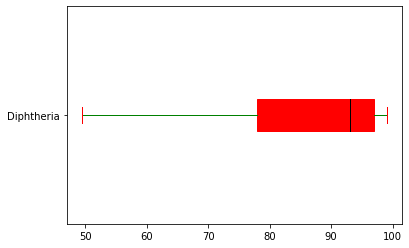

In [1082]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Diphtheria'].plot.box(color=props2, patch_artist = True, vert = False)

# HIV/AIDS

In [1083]:
df.value_counts('HIV_AIDS')

HIV_AIDS
0.1     1781
0.2      124
0.3      115
0.4       69
0.5       42
        ... 
14.4       1
14.3       1
14.1       1
13.9       1
50.6       1
Length: 200, dtype: int64

<AxesSubplot:xlabel='HIV_AIDS', ylabel='Density'>

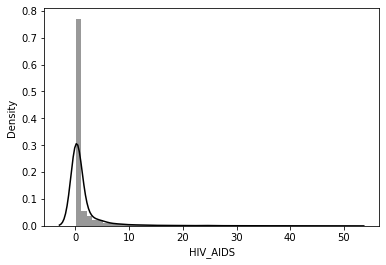

In [1084]:
#______histogram
sns.distplot(df['HIV_AIDS'],color='black')

<AxesSubplot:>

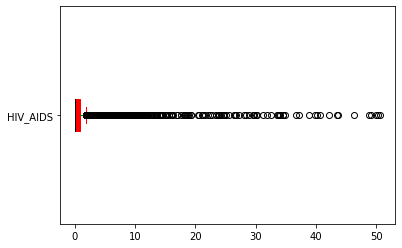

In [1085]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['HIV_AIDS'].plot.box(color=props2, patch_artist = True, vert = False)

In [1086]:
# Outliers
q1 = df['HIV_AIDS'].quantile(0.25)
q3 = df['HIV_AIDS'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1087]:
df['HIV_AIDS'] = np.where(df['HIV_AIDS']>ul, ul, df['HIV_AIDS'])
df['HIV_AIDS'] = np.where(df['HIV_AIDS']<ll, ll, df['HIV_AIDS'])

<AxesSubplot:>

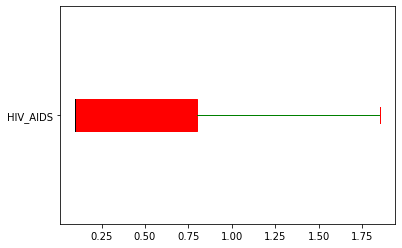

In [1088]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['HIV_AIDS'].plot.box(color=props2, patch_artist = True, vert = False)

In [1089]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Life_expectancy                  2938 non-null   float64
 3   Adult_Mortality                  2938 non-null   float64
 4   infant_deaths                    2938 non-null   float64
 5   Alcohol                          2938 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   Hepatitis_B                      2938 non-null   float64
 8   Measles                          2938 non-null   float64
 9   BMI                              2938 non-null   float64
 10  under_five_deaths                2938 non-null   float64
 11  Polio                            2938 non-null   float64
 12  Total_expenditure   

# GDP

In [1090]:
df.value_counts('GDP')

GDP
1766.947595      448
4199.472530        1
4167.364387        1
4167.714170        1
4177.657789        1
                ... 
699.452847         1
711.181716         1
711.469946         1
712.184769         1
119172.741800      1
Length: 2491, dtype: int64

<AxesSubplot:xlabel='GDP', ylabel='Density'>

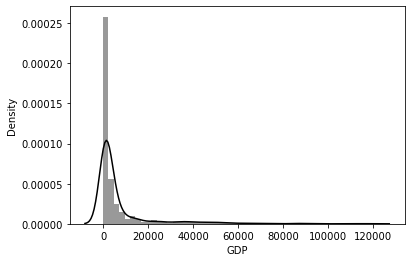

In [1091]:
#______histogram
sns.distplot(df['GDP'],color='black')

<AxesSubplot:>

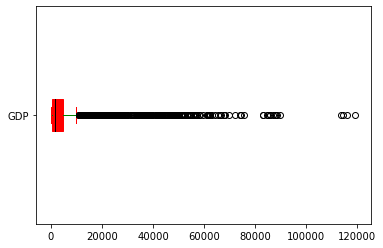

In [1092]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['GDP'].plot.box(color=props2, patch_artist = True, vert = False)

In [1093]:
# Outliers
q1 = df['GDP'].quantile(0.25)
q3 = df['GDP'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1094]:
df['GDP'] = np.where(df['GDP']>ul, ul, df['GDP'])
df['GDP'] = np.where(df['GDP']<ll, ll, df['GDP'])

<AxesSubplot:>

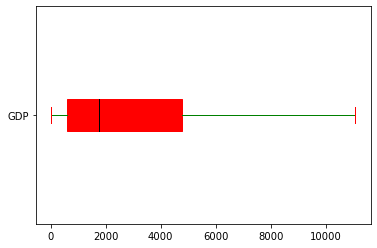

In [1095]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['GDP'].plot.box(color=props2, patch_artist = True, vert = False)

# Population

In [1096]:
df.value_counts('Population')

Population
1.386542e+06    652
4.440000e+02      4
7.182390e+05      2
1.141000e+03      2
2.920000e+02      2
               ... 
4.591910e+05      1
4.583240e+05      1
4.561550e+05      1
4.559330e+05      1
1.293859e+09      1
Length: 2279, dtype: int64

<AxesSubplot:xlabel='Population', ylabel='Density'>

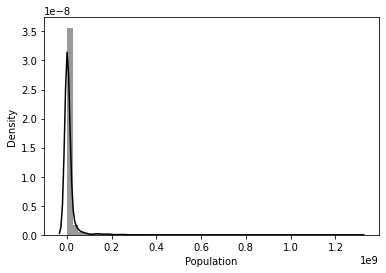

In [1097]:
#______histogram
sns.distplot(df['Population'],color='black')

<AxesSubplot:>

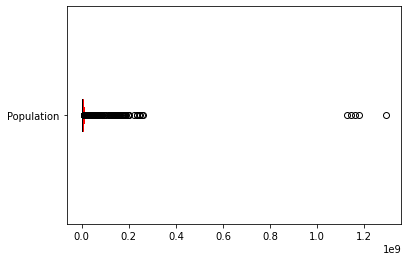

In [1098]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Population'].plot.box(color=props2, patch_artist = True, vert = False)

In [1099]:
# Outliers
q1 = df['Population'].quantile(0.25)
q3 = df['Population'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1100]:
df['Population'] = np.where(df['Population']>ul, ul, df['Population'])
df['Population'] = np.where(df['Population']<ll, ll, df['Population'])

<AxesSubplot:>

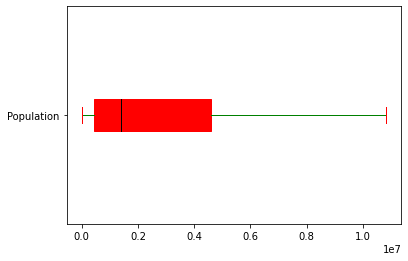

In [1101]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Population'].plot.box(color=props2, patch_artist = True, vert = False)

# thinness-1-19years

In [1102]:
df.value_counts('thinness_one_nineteen_years')

thinness_one_nineteen_years
1.0     74
3.3     72
1.9     65
0.8     64
0.7     63
        ..
18.1     1
18.4     1
18.7     1
18.8     1
27.7     1
Length: 200, dtype: int64

<AxesSubplot:xlabel='thinness_one_nineteen_years', ylabel='Density'>

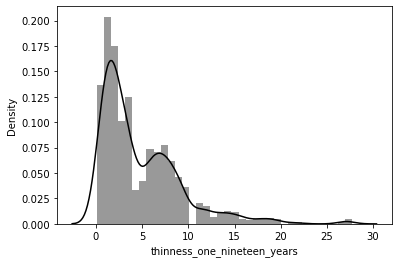

In [1103]:
#______histogram
sns.distplot(df['thinness_one_nineteen_years'],color='black')

<AxesSubplot:>

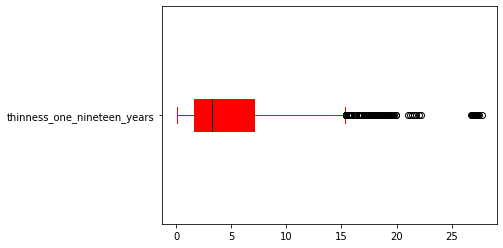

In [1104]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['thinness_one_nineteen_years'].plot.box(color=props2, patch_artist = True, vert = False)

In [1105]:
# Outliers
q1 = df['thinness_one_nineteen_years'].quantile(0.25)
q3 = df['thinness_one_nineteen_years'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1106]:
df['thinness_one_nineteen_years'] = np.where(df['thinness_one_nineteen_years']>ul, ul, df['thinness_one_nineteen_years'])
df['thinness_one_nineteen_years'] = np.where(df['thinness_one_nineteen_years']<ll, ll, df['thinness_one_nineteen_years'])

<AxesSubplot:>

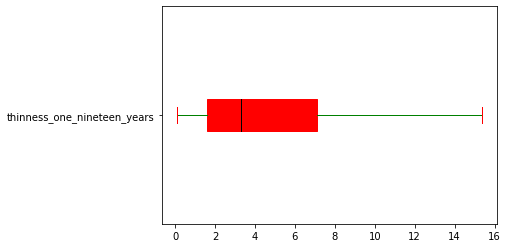

In [1107]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['thinness_one_nineteen_years'].plot.box(color=props2, patch_artist = True, vert = False)

# thinness-5-9years

In [1108]:
df.value_counts('thinness_five_nine_years')

thinness_five_nine_years
3.3     81
0.9     69
1.1     67
0.5     63
1.9     63
        ..
14.9     1
14.6     1
19.3     1
19.5     1
28.6     1
Length: 207, dtype: int64

<AxesSubplot:xlabel='thinness_five_nine_years', ylabel='Density'>

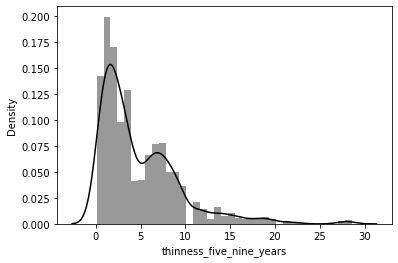

In [1109]:
#______histogram
sns.distplot(df['thinness_five_nine_years'],color='black')

<AxesSubplot:>

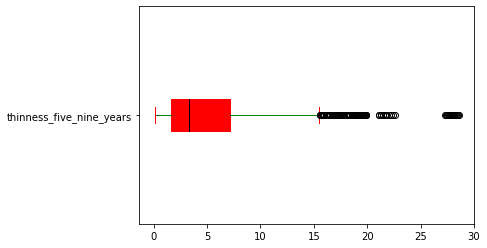

In [1110]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['thinness_five_nine_years'].plot.box(color=props2, patch_artist = True, vert = False)

In [1111]:
# Outliers
q1 = df['thinness_five_nine_years'].quantile(0.25)
q3 = df['thinness_five_nine_years'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1112]:
df['thinness_five_nine_years'] = np.where(df['thinness_five_nine_years']>ul, ul, df['thinness_five_nine_years'])
df['thinness_five_nine_years'] = np.where(df['thinness_five_nine_years']<ll, ll, df['thinness_five_nine_years'])

<AxesSubplot:>

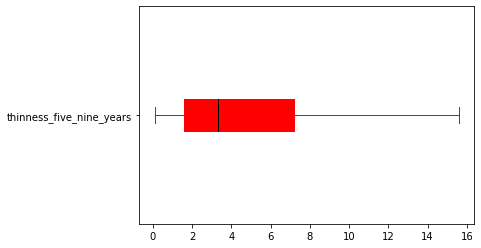

In [1113]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['thinness_five_nine_years'].plot.box(color=props2, patch_artist = True, vert = False)

# Income_composition_of_resources

In [1114]:
df.value_counts('Income_composition_of_resources')

Income_composition_of_resources
0.677    176
0.000    130
0.700     17
0.739     13
0.636     12
        ... 
0.420      1
0.431      1
0.432      1
0.460      1
0.948      1
Length: 625, dtype: int64

<AxesSubplot:xlabel='Income_composition_of_resources', ylabel='Density'>

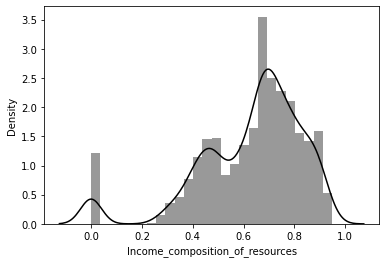

In [1115]:
#______histogram
sns.distplot(df['Income_composition_of_resources'],color='black')

<AxesSubplot:>

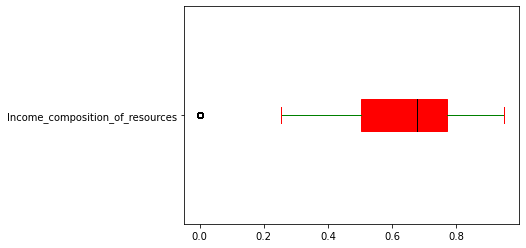

In [1116]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Income_composition_of_resources'].plot.box(color=props2, patch_artist = True, vert = False)

# Schooling

In [1117]:
df.value_counts('Schooling')

Schooling
12.3    207
12.9     58
13.3     52
12.5     49
12.8     46
       ... 
3.0       1
3.6       1
3.1       1
3.4       1
20.7      1
Length: 173, dtype: int64

<AxesSubplot:xlabel='Schooling', ylabel='Density'>

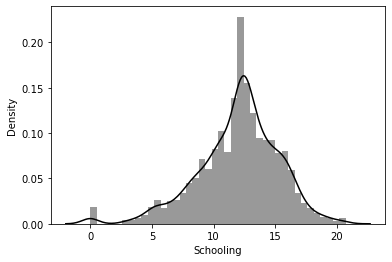

In [1118]:
#______histogram
sns.distplot(df['Schooling'],color='black')

<AxesSubplot:>

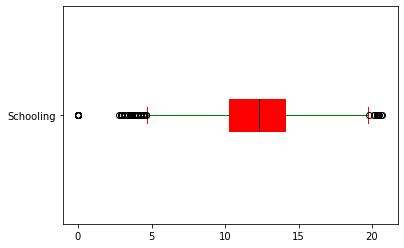

In [1119]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Schooling'].plot.box(color=props2, patch_artist = True, vert = False)

In [1120]:
# Outliers
q1 = df['Schooling'].quantile(0.25)
q3 = df['Schooling'].quantile(0.75)
iqr = q3-q1

ll = q1-(1.5*iqr)
ul = q3+(1.5*iqr)

In [1121]:
df['Schooling'] = np.where(df['Schooling']>ul, ul, df['Schooling'])
df['Schooling'] = np.where(df['Schooling']<ll, ll, df['Schooling'])

<AxesSubplot:>

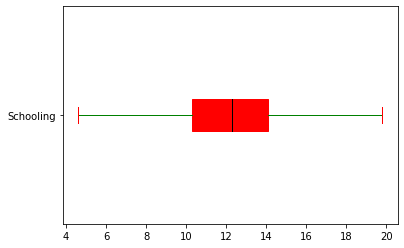

In [1122]:
props2 = dict(boxes = 'red', whiskers = 'green', medians = 'black', caps = 'red')
df['Schooling'].plot.box(color=props2, patch_artist = True, vert = False)

In [1123]:
corr = df.corr()
corr.style.background_gradient(cmap='Accent')


,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_one_nineteen_years,thinness_five_nine_years,Income_composition_of_resources,Schooling
Year,1.000000,0.001864,0.170543,-0.067261,-0.047331,-0.069201,0.032619,0.021880,-0.121195,0.108484,-0.052794,0.111909,0.074552,0.143942,-0.089499,0.132267,0.031588,-0.049312,-0.049736,0.236594,0.199218
Status,0.001864,1.000000,-0.482360,0.327307,0.291932,-0.579999,-0.421979,-0.162035,0.131963,-0.309371,0.294629,-0.259635,-0.290431,-0.260882,0.289058,-0.432258,0.024055,0.393320,0.393960,-0.460677,-0.509512
Life_expectancy,0.170543,-0.482360,1.000000,-0.691237,-0.567067,0.390095,0.487786,0.249124,-0.337101,0.557858,-0.604030,0.562904,0.211388,0.568659,-0.796758,0.526470,-0.082224,-0.508655,-0.505916,0.689374,0.737210
Adult_Mortality,-0.067261,0.327307,-0.691237,1.000000,0.384019,-0.199278,-0.322030,-0.185393,0.210988,-0.390576,0.408191,-0.349550,-0.127969,-0.348201,0.602362,-0.342676,0.080372,0.339368,0.346843,-0.447359,-0.462187
infant_deaths,-0.047331,0.291932,-0.567067,0.384019,1.000000,-0.323349,-0.344931,-0.292647,0.581518,-0.443970,0.994243,-0.421309,-0.146293,-0.412558,0.415331,-0.363219,0.356667,0.423598,0.439710,-0.375204,-0.503678
Alcohol,-0.069201,-0.579999,0.390095,-0.199278,-0.323349,1.000000,0.396079,0.138774,-0.192018,0.313031,-0.330065,0.257709,0.296333,0.262426,-0.190215,0.400442,0.001615,-0.431954,-0.422357,0.418435,0.518329
percentage_expenditure,0.032619,-0.421979,0.487786,-0.322030,-0.344931,0.396079,1.000000,0.128623,-0.194216,0.326217,-0.353278,0.262177,0.171598,0.260794,-0.294376,0.852545,-0.012929,-0.328551,-0.330494,0.479276,0.525224
Hepatitis_B,0.021880,-0.162035,0.249124,-0.185393,-0.292647,0.138774,0.128623,1.000000,-0.216144,0.155540,-0.294236,0.512302,0.066298,0.538819,-0.197830,0.172677,-0.129572,-0.115864,-0.122733,0.188361,0.228334
Measles,-0.121195,0.131963,-0.337101,0.210988,0.581518,-0.192018,-0.194216,-0.216144,1.000000,-0.314900,0.579652,-0.321618,-0.155244,-0.316199,0.224559,-0.209394,0.247381,0.355895,0.360577,-0.206069,-0.323536
BMI,0.108484,-0.309371,0.557858,-0.390576,-0.443970,0.313031,0.326217,0.155540,-0.314900,1.000000,-0.464736,0.338622,0.230745,0.337478,-0.477554,0.373982,-0.064920,-0.556299,-0.564766,0.471947,0.525651


<AxesSubplot:>

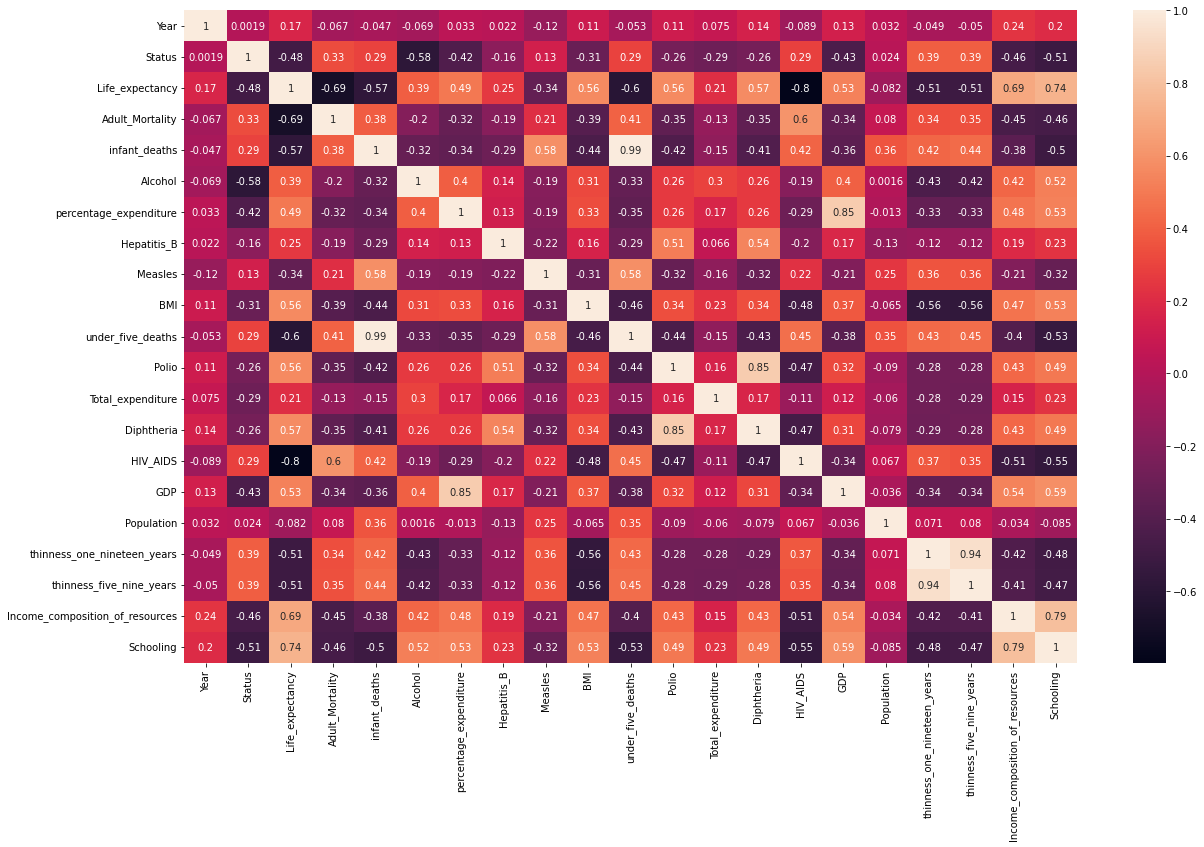

In [1124]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

In [1125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Life_expectancy                  2938 non-null   float64
 3   Adult_Mortality                  2938 non-null   float64
 4   infant_deaths                    2938 non-null   float64
 5   Alcohol                          2938 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   Hepatitis_B                      2938 non-null   float64
 8   Measles                          2938 non-null   float64
 9   BMI                              2938 non-null   float64
 10  under_five_deaths                2938 non-null   float64
 11  Polio                            2938 non-null   float64
 12  Total_expenditure   

In [1127]:
numeric = df.select_dtypes(include='number')

In [1128]:
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Status                           2938 non-null   int64  
 2   Life_expectancy                  2938 non-null   float64
 3   Adult_Mortality                  2938 non-null   float64
 4   infant_deaths                    2938 non-null   float64
 5   Alcohol                          2938 non-null   float64
 6   percentage_expenditure           2938 non-null   float64
 7   Hepatitis_B                      2938 non-null   float64
 8   Measles                          2938 non-null   float64
 9   BMI                              2938 non-null   float64
 10  under_five_deaths                2938 non-null   float64
 11  Polio                            2938 non-null   float64
 12  Total_expenditure   

In [1129]:
b = []
for i in numeric:
    if len(df[i].unique())>3:
        b.append(i)

In [1130]:
print(b)

['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_one_nineteen_years', 'thinness_five_nine_years', 'Income_composition_of_resources', 'Schooling']


In [1131]:
data_conti = df[b]

In [1132]:
data_conti.columns

Index(['Year', 'Life_expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'BMI',
       'under_five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria',
       'HIV_AIDS', 'GDP', 'Population', 'thinness_one_nineteen_years',
       'thinness_five_nine_years', 'Income_composition_of_resources',
       'Schooling'],
      dtype='object')

In [1133]:
vif_data = pd.DataFrame()
vif_data["feature"] = data_conti.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_conti.values,i) for i in range(len(data_conti.columns))]
  
print(vif_data)

                            feature         VIF
0                              Year  417.190272
1                   Life_expectancy  362.203992
2                   Adult_Mortality    5.927356
3                     infant_deaths  163.639809
4                           Alcohol    3.787704
5            percentage_expenditure    5.905314
6                       Hepatitis_B   76.279655
7                           Measles    2.305841
8                               BMI    8.698372
9                 under_five_deaths  173.890795
10                            Polio  113.932835
11                Total_expenditure    8.452873
12                       Diphtheria  120.060234
13                         HIV_AIDS    5.016956
14                              GDP    7.661228
15                       Population    2.035201
16      thinness_one_nineteen_years   22.342071
17         thinness_five_nine_years   22.452935
18  Income_composition_of_resources   31.464700
19                        Schooling   64

In [1134]:
df.drop(['Year','infant_deaths','Hepatitis_B','under_five_deaths','Polio','Diphtheria','thinness_one_nineteen_years','thinness_five_nine_years','Income_composition_of_resources','Schooling'],axis=1 ,inplace=True)

In [1135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Status                  2938 non-null   int64  
 1   Life_expectancy         2938 non-null   float64
 2   Adult_Mortality         2938 non-null   float64
 3   Alcohol                 2938 non-null   float64
 4   percentage_expenditure  2938 non-null   float64
 5   Measles                 2938 non-null   float64
 6   BMI                     2938 non-null   float64
 7   Total_expenditure       2938 non-null   float64
 8   HIV_AIDS                2938 non-null   float64
 9   GDP                     2938 non-null   float64
 10  Population              2938 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 252.6 KB


# Running Linear regression

In [1136]:
col = df.columns
df.head()

,Status,Life_expectancy,Adult_Mortality,Alcohol,percentage_expenditure,Measles,BMI,Total_expenditure,HIV_AIDS,GDP,Population
0,1,65.0,263.0,0.01,71.279624,900.625,19.1,8.16,0.1,584.259210,10832552.25
1,1,59.9,271.0,0.01,73.523582,492.000,18.6,8.18,0.1,612.696514,327582.00
2,1,59.9,268.0,0.01,73.219243,430.000,18.1,8.13,0.1,631.744976,10832552.25
3,1,59.5,272.0,0.01,78.184215,900.625,17.6,8.52,0.1,669.959000,3696958.00
4,1,59.2,275.0,0.01,7.097109,900.625,17.2,7.87,0.1,63.537231,2978599.00


In [1137]:
for i in col:
    print(i,'+',end=" ")

Status + Life_expectancy + Adult_Mortality + Alcohol + percentage_expenditure + Measles + BMI + Total_expenditure + HIV_AIDS + GDP + Population + 

In [1138]:
model_1=smf.ols(formula='Life_expectancy~ Status + Adult_Mortality + Alcohol + percentage_expenditure + Measles + BMI + Total_expenditure + HIV_AIDS + GDP + Population',data=df).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1173.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:58:36   Log-Likelihood:                -8410.1
No. Observations:                2938   AIC:                         1.684e+04
Df Residuals:                    2927   BIC:                         1.691e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 74

In [1139]:
df.drop(['Population'],axis=1,inplace=True)

In [1140]:
model_1=smf.ols(formula='Life_expectancy~ Status + Adult_Mortality + Alcohol + percentage_expenditure + Measles + BMI + Total_expenditure + HIV_AIDS + GDP ',data=df).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1304.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        17:58:36   Log-Likelihood:                -8410.3
No. Observations:                2938   AIC:                         1.684e+04
Df Residuals:                    2928   BIC:                         1.690e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 74

In [1141]:
import seaborn as sns

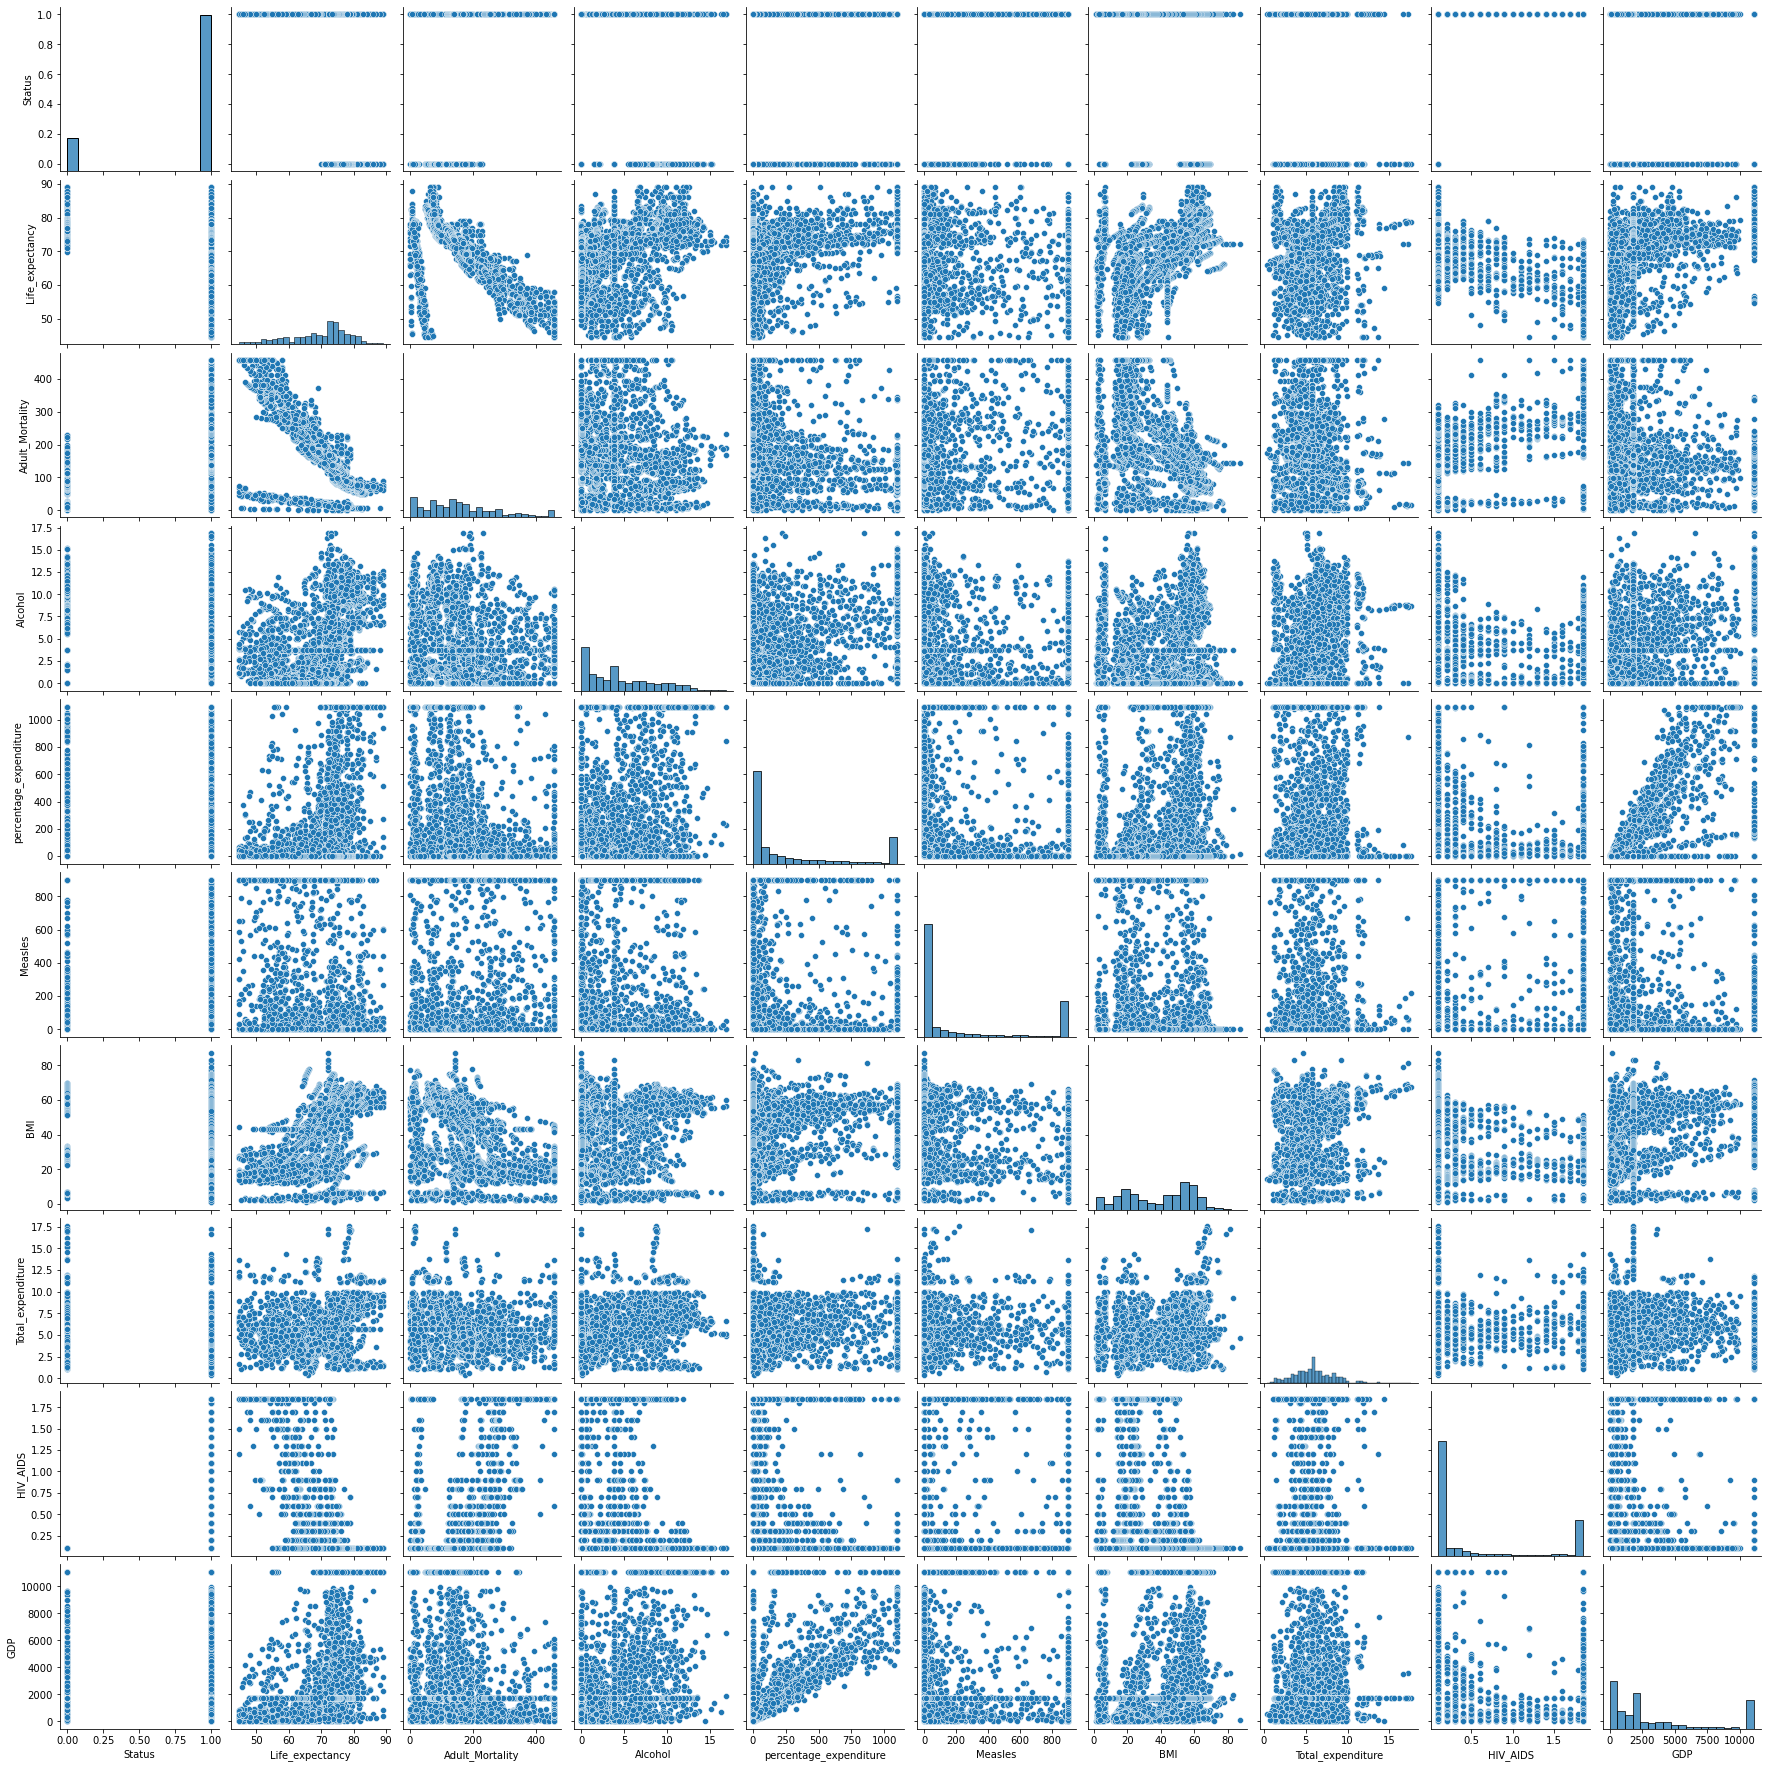

In [1142]:
sns.pairplot(df)
plt.show()

In [1143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Status                  2938 non-null   int64  
 1   Life_expectancy         2938 non-null   float64
 2   Adult_Mortality         2938 non-null   float64
 3   Alcohol                 2938 non-null   float64
 4   percentage_expenditure  2938 non-null   float64
 5   Measles                 2938 non-null   float64
 6   BMI                     2938 non-null   float64
 7   Total_expenditure       2938 non-null   float64
 8   HIV_AIDS                2938 non-null   float64
 9   GDP                     2938 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 229.7 KB


In [1144]:
X=df.drop(['Life_expectancy'],axis=1)
Y=df.Life_expectancy

# standard scaling

In [1145]:
from sklearn.preprocessing import StandardScaler

In [1146]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train test split

In [1147]:
x=df.drop(columns='Life_expectancy')
y=df['Life_expectancy']

In [1148]:
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=20)

# linear regression

In [1149]:
lr=LinearRegression()

In [1150]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_lr=round(r2_score(y_test,y_pred)*100,2)
print('R2_score: ',r2_lr)
mse_lr=round(mean_squared_error(y_test,y_pred),2)
print('MSE_score:',mse_lr)
rmse = np.sqrt(mse_lr)
print('RMSE:',rmse)

R2_score:  78.02
MSE_score: 19.15
RMSE: 4.376071297408213


In [1151]:
y_test

2868    73.6
2128    72.5
1477    52.2
1561    62.3
2872    72.5
        ... 
1954    63.5
1942    66.4
2589    74.9
2103    72.1
1536    71.2
Name: Life_expectancy, Length: 588, dtype: float64

In [1152]:
predictions = lr.predict(X_test)#prediction

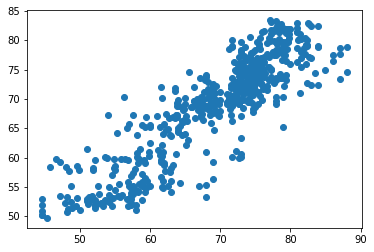

In [1153]:
plt.scatter(y_test,predictions)

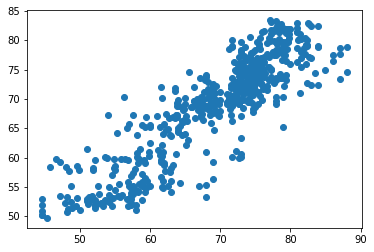

In [1154]:
plt.scatter(y_test,y_pred)#scatter

# Decision tree

In [1155]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [1156]:
#define the parameter space for the hyperparemeters
param_grid={'splitter':['best','random'],
           'criterion':['mse', 'friedman_mse'],
           'max_depth':sp_randint(2,10),
           'min_samples_split':sp_randint(1,10)}

In [1157]:
#create the Randomizedsearchcv object
decireg=DecisionTreeRegressor()
random_search=RandomizedSearchCV(decireg,param_grid,cv=5,n_jobs=-1)

In [1158]:
random_search.fit(X_train,y_train)
y_pred1=random_search.predict(X_test)
r2_dt=round(r2_score(y_test,y_pred1)*100,2)
print('R2 score:',r2_dt)
mse_dt=round(mean_squared_error(y_test,y_pred1),2)
print('mse: ',mse_dt)
rmse_dt=round(np.sqrt(mse_dt),2)
print('RMSE:',rmse_dt)

R2 score: 90.31
mse:  8.45
RMSE: 2.91


# Random Forest

In [1159]:
x1=df.drop(['Life_expectancy'],axis=1)
y1=df.Life_expectancy

In [1160]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.2,random_state = 8)

In [1161]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100,random_state=0)

In [1162]:
model_rf=rf.fit(x_train,y_train)

In [1163]:
y_pred=model_rf.predict(x_test)
r2=r2_score(y_test,y_pred)
print('R.sqr: ',r2)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print('RMSE: ',rmse)

R.sqr:  0.9459132148147993
RMSE:  2.1860130054741447


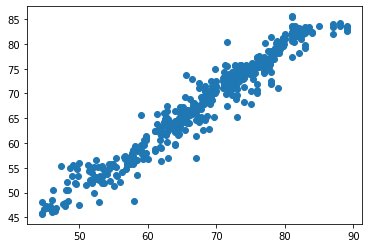

In [1164]:
plt.scatter(y_test,y_pred)#scatter

# SVM

In [1165]:
from sklearn import svm
from sklearn.svm import SVC

In [1166]:
x2=df.drop(columns='Life_expectancy')
y2=df['Life_expectancy']

In [1167]:
X_train, X_test, y_train, y_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [1168]:
# Define the SVM model
model_svm = svm.SVR(kernel='rbf', C=1, gamma='scale')

In [1169]:
model_svm.fit(X_train, y_train)

SVR(C=1)

In [1170]:
# Make predictions on the testing data
y_pred = model_svm.predict(X_test)

In [1171]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [1172]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 46.46001699909991
R-squared: 0.463144533805552


# KNN

In [1173]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

In [1174]:
x3 = df.drop(columns ='Life_expectancy')
y3 = df['Life_expectancy']

In [1175]:
X_train, X_test, y_train, y_test = train_test_split(x3, y3, test_size=0.2, random_state=42)

In [1176]:
# Define the KNN model
model_knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')

In [1177]:
# Train the model on the training data
model_knn.fit(X_train, y_train)

KNeighborsRegressor()

In [1178]:
# Make predictions on the testing data
y_pred = model_knn.predict(X_test)

In [1179]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [1180]:
def fit_evaluate(models_dic, x_train, x_test, y_train, y_test):
    mae, rmse, train_acc, test_acc = [], [], [], []
    performance ={}
    
    for model in models.values():
        model.fit(x_train, y_train)
        prediction = model.predict(x_test)
        mae.append(mean_absolute_error(y_test, prediction))
        rmse.append(mean_squared_error(y_test, prediction, squared=False))
        train_acc.append(model.score(x_train, y_train))
        test_acc.append(model.score(x_test, y_test))
    
    performance['mean_absolute_error'] = mae
    performance['mean_squared_error'] = rmse
    performance['train_accuracy'] = train_acc
    performance['test_accuracy'] = test_acc
    
    return pd.DataFrame(performance, index = models.keys())

In [1181]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error , mean_squared_error

models = { 'Linear Reg' : LinearRegression(),
           'Ridge' : Ridge(),
           'Lasso' : Lasso(),
           'SVR' : SVR(),
           'Decision Tree' : DecisionTreeRegressor(),
           'RF' :RandomForestRegressor(), 
           'Ada Boost' : AdaBoostRegressor(),
           'Grad Boost' : GradientBoostingRegressor()}
          
results = fit_evaluate(models, X_train, X_test, y_train, y_test)  
results

,mean_absolute_error,mean_squared_error,train_accuracy,test_accuracy
Linear Reg,3.065321,4.028309,0.797181,0.812490
Ridge,3.065134,4.028147,0.797180,0.812505
Lasso,3.312876,4.543802,0.747894,0.761430
SVR,5.197833,6.816159,0.425786,0.463145
Decision Tree,1.808929,2.827986,0.999868,0.907587
RF,1.377354,2.122434,0.992282,0.947947
Ada Boost,2.514404,3.221072,0.881428,0.880111
Grad Boost,1.795849,2.503622,0.939172,0.927570


In [1182]:
results.T

,Linear Reg,Ridge,Lasso,SVR,Decision Tree,RF,Ada Boost,Grad Boost
mean_absolute_error,3.065321,3.065134,3.312876,5.197833,1.808929,1.377354,2.514404,1.795849
mean_squared_error,4.028309,4.028147,4.543802,6.816159,2.827986,2.122434,3.221072,2.503622
train_accuracy,0.797181,0.797180,0.747894,0.425786,0.999868,0.992282,0.881428,0.939172
test_accuracy,0.812490,0.812505,0.761430,0.463145,0.907587,0.947947,0.880111,0.927570


## Let's answer the following questions one by one:

A. Feature Selection: Do various predicting factors which have been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting life expectancy?

Ans. Kind of yes, the predicting factors do affect life expectancy in one way or the another. We performed various kinds of feature selections. We saw that leaving out some features do affect the average value of life expectancy. This simple has the reason that for example alcohol has adverse effect on the liver, which in turn affects our life expectancy. Same thing happes with various disease like Hepatitis or Measles, which further have the capacity to reduce our life expectancy


B. Should a country having a lower life expectancy value (<65) increase its healthcare expenditure in order to improve its average lifespan?

Ans. Let's draw a graph and see that how life expectancy depends on the percentage expenditure factor:

<function matplotlib.pyplot.show(close=None, block=None)>

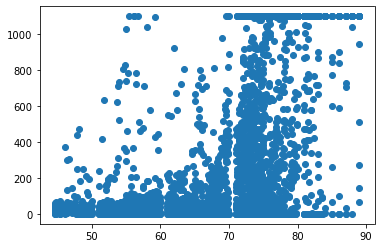

In [1183]:
life = df['Life_expectancy'].tolist()
exp = df['percentage_expenditure'].tolist()

import matplotlib.pyplot as plt
plt.scatter(life, exp)
plt.show

We observe an interesting situation here! We see that if the average life of a country, if the average age is between 65 to 85, then the avergae spending plays a tremendous part here!
So, yes, countries with average life expectance above 65 should spend more in order to improve the average lifespan

C. How do Infant and Adult mortality rates affect life expectancy?

Ans. The correlation between infant mortality rate and adult mortality rate and the average lifespan is as follows:
IMR and Lifespan: -0.196557
AMR and Lifespan: -0.696359
We see that the correlation between these two and average lifespan is negative, which means that if the infant mortality rate or the adult mortality rate rises, then the average lifespan decrease, which is quite intuitive

D. Does Life Expectancy have positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc

Ans. Let's see the correlation between the life expectancy and various lifestyle habits like Alcohol.
Alcohol and Lifespan: 0.389967
So, we can say that alcohol affects the life expectancy upto some extent as seen by the correlation coefficient!

E. What is the impact of schooling on the lifespan of humans?

Ans. We can say that schooling has a very strong direct correlation with the average lifespan, with a Pearson's correlation coefficient of 0.737210. This may be due to the fact that schooling teaches many things about a healthy lifestyle and even first aids, which can be life saving in critical conditions

F. Does Life Expectancy have a positive or negative relationship with drinking alcohol?

Ans.Life expectancy has a direct positive correlation with drinking alcohol with a correlation coefficient of  0.389967

G. Do densely populated countries tend to have lower life expectancy?

Ans. The correlation coefficient of the population of a country and the life expectancy is -0.021538, which basically means that if the population rises, then the life expectancy decrease. This may be due to the fact the more population have severe effect on the capacity of the health system and it may crash because of this

H. What is the impact of Immunization coverage on life Expectancy?

Ans. Overall, high immunization coverage is a key factor in improving public health and increasing life expectancy, especially in low- and middle-income countries where access to healthcare and vaccines is limited.